<a href="https://colab.research.google.com/github/ALK26/Projects/blob/master/Alice_in_Wonderland_Word_Clouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

In [ ]:
# Word Clouds (also known as text clouds or tag clouds) work in a simple way: 
# the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

# Luckily, a Python package already exists for generating word clouds. 
# The package, called word_cloud was developed by Andreas Mueller to generate a word cloud for a given text document.

# First, install the package.

# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

/bin/bash: conda: command not found
Wordcloud is installed and imported!


File downloaded and saved!


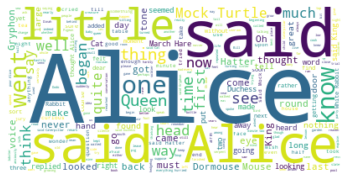

In [ ]:
# download file and save as alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

#next, use the stopwords that imported from word_cloud. use the function set to remove any redundant stopwords.

stopwords = set(STOPWORDS)

#create a word cloud object and generate a word cloud. For simplicity, generate a word cloud using only the first 2000 words in the novel.

# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

# Now that the word cloud is created, visualize it.

# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

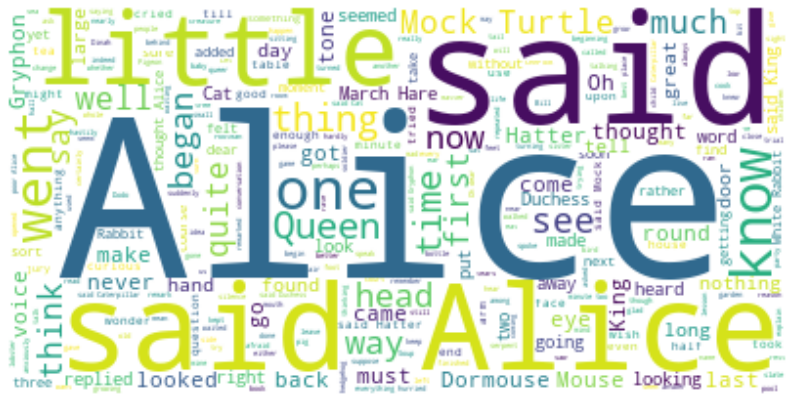

In [ ]:
# interesting! So in the first 2000 words in the novel, the most common words are Alice, said, little, Queen, and so on. 
# resize the cloud so that can see the less frequent words a little better.

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

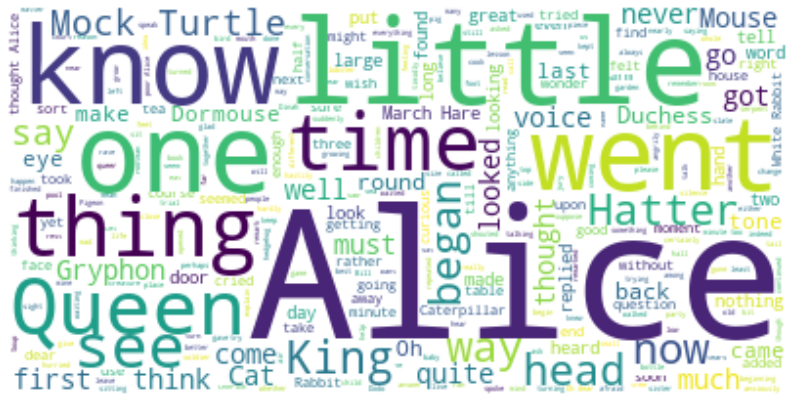

In [ ]:
# Much better however, said isn't really an informative word. add it to our stopwords and re-generate the cloud.

stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Another cool thing you can implement with the word_cloud package is superimposing the words onto a mask of any shape. 
# Example: use a mask of Alice and her rabbit with already created mask, go ahead and download it and call it alice_mask.png.
from PIL import Image # converting images into arrays
# download image
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/alice_mask.png
    
# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


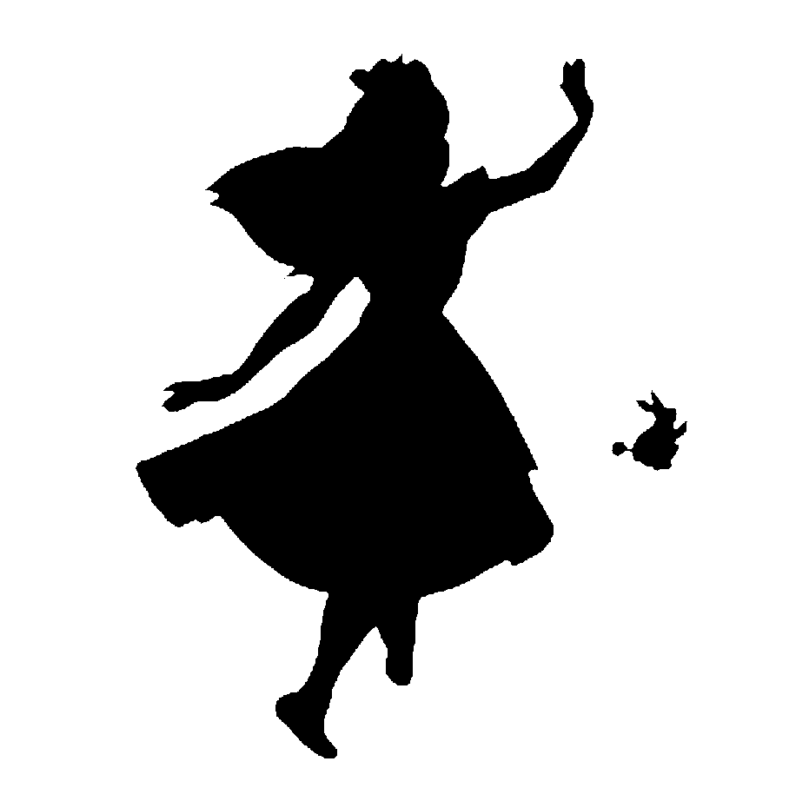

In [ ]:
# take a look at how the mask looks like.

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

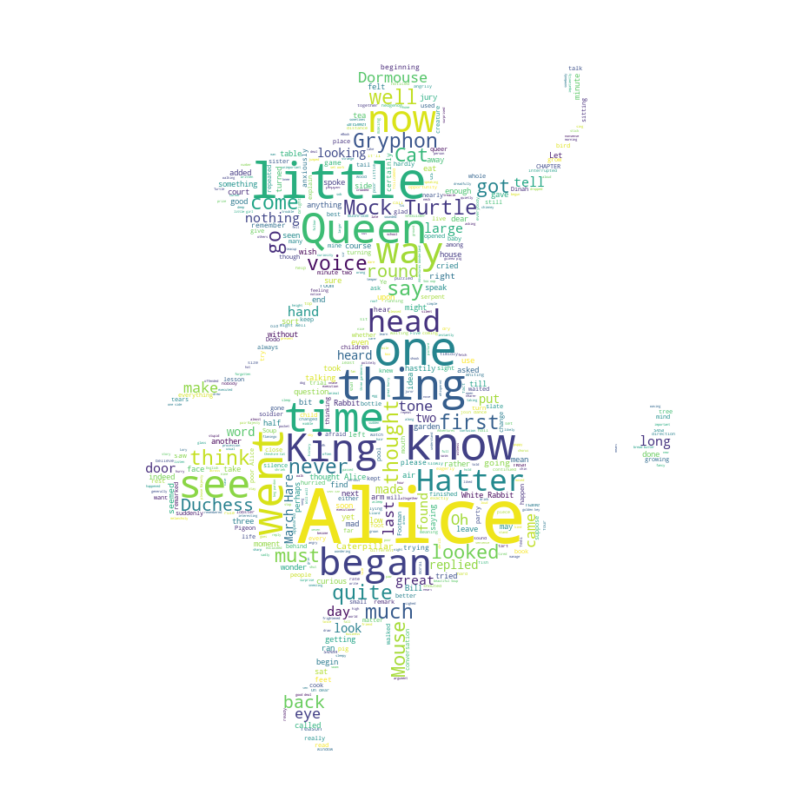

In [ ]:
# Shaping the word cloud according to the mask is straightforward using word_cloud package. For example, will continue using the first 2000 words in the novel.

# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()